In [30]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
path = Path('data')
os.listdir(path)

['.ipynb_checkpoints',
 'train.csv',
 'sample_submission.csv',
 'label_num_to_disease_map.json',
 'test_images',
 'train_images']

In [6]:
extra_labels = os.listdir(path/'extra'/'train')
extra_labels

['cbsd', 'cbb', 'cmd', 'healthy', 'cgm']

In [10]:
map2labs = {
    'cbb': 0,
    'cbsd': 1,
    'cgm': 2,
    'cmd': 3,
    'healthy': 4
    
}

In [11]:
for lab in extra_labels:
    imgs = os.listdir(path/'extra'/'train'/lab)
    print(lab, map2labs[lab], len(imgs))
    

cbsd 1 1443
cbb 0 466
cmd 3 2658
healthy 4 316
cgm 2 773


In [14]:
train = pd.read_csv(path/'train.csv')
train

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3
...,...,...
21392,999068805.jpg,3
21393,999329392.jpg,3
21394,999474432.jpg,1
21395,999616605.jpg,4


In [17]:
old_imgs = [f'train_imgs/{img}' for img in train['image_id'].values]
old_labs = train['label'].tolist()

len(old_imgs), len(old_labs)

(21397, 21397)

In [26]:
new_imgs, new_labs = [], []
for lab in extra_labels:
    imgs = os.listdir(path/'extra'/'train'/lab)
    new_imgs += [f'extra/train/{lab}/{img}' for img in imgs]
    new_labs += [map2labs[lab]]*len(imgs)

len(new_imgs), len(new_labs)

(5656, 5656)

In [27]:
new_imgs

['extra/train/cbsd/train-cbsd-308.jpg',
 'extra/train/cbsd/train-cbsd-424.jpg',
 'extra/train/cbsd/train-cbsd-330.jpg',
 'extra/train/cbsd/train-cbsd-1258.jpg',
 'extra/train/cbsd/train-cbsd-313.jpg',
 'extra/train/cbsd/train-cbsd-1267.jpg',
 'extra/train/cbsd/train-cbsd-454.jpg',
 'extra/train/cbsd/train-cbsd-1395.jpg',
 'extra/train/cbsd/train-cbsd-410.jpg',
 'extra/train/cbsd/train-cbsd-522.jpg',
 'extra/train/cbsd/train-cbsd-214.jpg',
 'extra/train/cbsd/train-cbsd-747.jpg',
 'extra/train/cbsd/train-cbsd-1214.jpg',
 'extra/train/cbsd/train-cbsd-17.jpg',
 'extra/train/cbsd/train-cbsd-114.jpg',
 'extra/train/cbsd/train-cbsd-412.jpg',
 'extra/train/cbsd/train-cbsd-780.jpg',
 'extra/train/cbsd/train-cbsd-1043.jpg',
 'extra/train/cbsd/train-cbsd-1417.jpg',
 'extra/train/cbsd/train-cbsd-897.jpg',
 'extra/train/cbsd/train-cbsd-1438.jpg',
 'extra/train/cbsd/train-cbsd-970.jpg',
 'extra/train/cbsd/train-cbsd-115.jpg',
 'extra/train/cbsd/train-cbsd-1103.jpg',
 'extra/train/cbsd/train-cbsd-118

In [28]:
train_extra = pd.DataFrame({
    'image_id': old_imgs + new_imgs,
    'label': old_labs + new_labs
})

train_extra

,image_id,label
0,train_imgs/1000015157.jpg,0
1,train_imgs/1000201771.jpg,3
2,train_imgs/100042118.jpg,1
3,train_imgs/1000723321.jpg,1
4,train_imgs/1000812911.jpg,3
...,...,...
27048,extra/train/cgm/train-cgm-256.jpg,2
27049,extra/train/cgm/train-cgm-645.jpg,2
27050,extra/train/cgm/train-cgm-84.jpg,2
27051,extra/train/cgm/train-cgm-297.jpg,2


## Data distribution

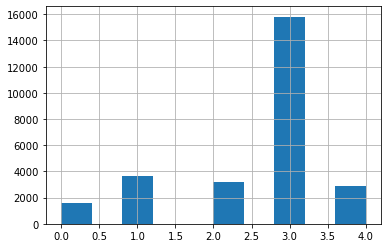

In [31]:
train_extra.label.hist()
plt.show()

## Data visualization

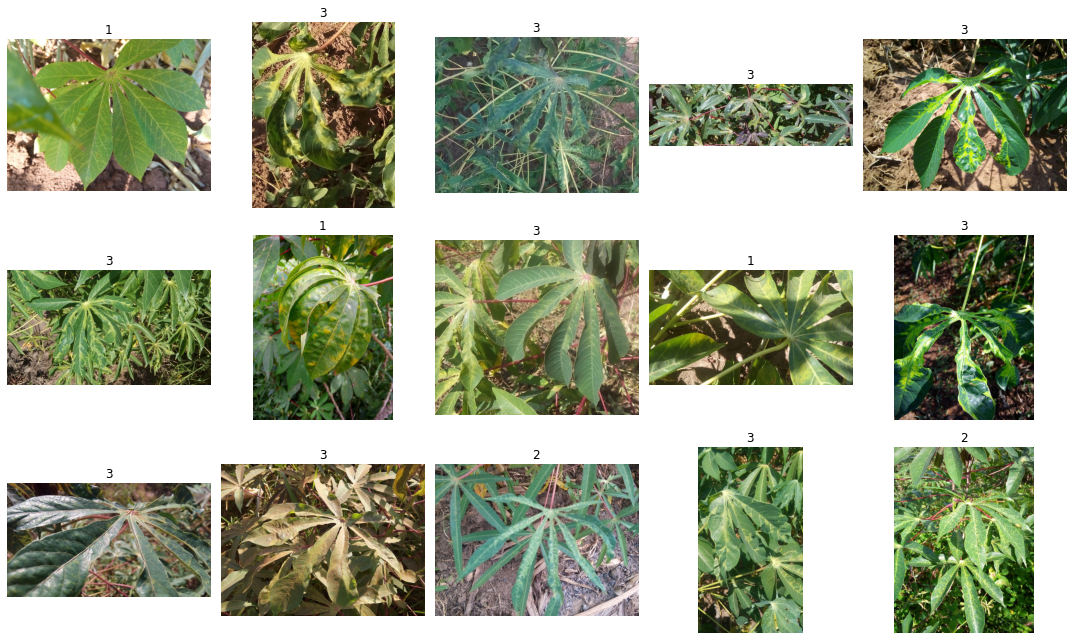

In [33]:
import random
import torchvision

r, c = 3, 5
fig = plt.figure(figsize=(3*c, 3*r))
for _r in range(r):
    for _c in range (c):
        ax = plt.subplot(r, c, _r*c + _c + 1)
        ix = random.randint(0, len(new_imgs))
        img = torchvision.io.read_image(str(path/new_imgs[ix]))
        label = new_labs[ix]
        plt.axis("off")
        plt.imshow(img.permute(1,2,0))
        plt.title(label)
plt.tight_layout()
plt.show()

In [34]:
from tqdm import tqdm

shapes = []
for img in tqdm(new_imgs):
    img = torchvision.io.read_image(str(path/img))
    if img.shape not in shapes:
        shapes.append(img.shape)

100%|██████████| 5656/5656 [00:43<00:00, 129.44it/s]


In [35]:
shapes

[torch.Size([3, 500, 625]),
 torch.Size([3, 500, 888]),
 torch.Size([3, 666, 500]),
 torch.Size([3, 500, 666]),
 torch.Size([3, 500, 701]),
 torch.Size([3, 500, 534]),
 torch.Size([3, 500, 665]),
 torch.Size([3, 500, 735]),
 torch.Size([3, 500, 530]),
 torch.Size([3, 500, 652]),
 torch.Size([3, 500, 796]),
 torch.Size([3, 500, 500]),
 torch.Size([3, 563, 500]),
 torch.Size([3, 500, 710]),
 torch.Size([3, 619, 500]),
 torch.Size([3, 500, 565]),
 torch.Size([3, 500, 618]),
 torch.Size([3, 500, 696]),
 torch.Size([3, 500, 509]),
 torch.Size([3, 500, 578]),
 torch.Size([3, 500, 521]),
 torch.Size([3, 500, 555]),
 torch.Size([3, 888, 500]),
 torch.Size([3, 500, 703]),
 torch.Size([3, 500, 563]),
 torch.Size([3, 500, 671]),
 torch.Size([3, 500, 588]),
 torch.Size([3, 500, 629]),
 torch.Size([3, 500, 730]),
 torch.Size([3, 571, 500]),
 torch.Size([3, 500, 603]),
 torch.Size([3, 500, 570]),
 torch.Size([3, 500, 575]),
 torch.Size([3, 554, 500]),
 torch.Size([3, 500, 524]),
 torch.Size([3, 500,

In [36]:
train_extra.to_csv(path/'train_extra.csv', index=False)

In [38]:
old_imgs

['train_imgs/1000015157.jpg',
 'train_imgs/1000201771.jpg',
 'train_imgs/100042118.jpg',
 'train_imgs/1000723321.jpg',
 'train_imgs/1000812911.jpg',
 'train_imgs/1000837476.jpg',
 'train_imgs/1000910826.jpg',
 'train_imgs/1001320321.jpg',
 'train_imgs/1001723730.jpg',
 'train_imgs/1001742395.jpg',
 'train_imgs/1001749118.jpg',
 'train_imgs/100204014.jpg',
 'train_imgs/1002088496.jpg',
 'train_imgs/1002255315.jpg',
 'train_imgs/1002394761.jpg',
 'train_imgs/1003218714.jpg',
 'train_imgs/1003298598.jpg',
 'train_imgs/1003442061.jpg',
 'train_imgs/1003888281.jpg',
 'train_imgs/1003987001.jpg',
 'train_imgs/1004105566.jpg',
 'train_imgs/1004163647.jpg',
 'train_imgs/1004389140.jpg',
 'train_imgs/1004672608.jpg',
 'train_imgs/100472565.jpg',
 'train_imgs/1004826518.jpg',
 'train_imgs/1004881261.jpg',
 'train_imgs/1005138819.jpg',
 'train_imgs/1005200906.jpg',
 'train_imgs/100533489.jpg',
 'train_imgs/100560400.jpg',
 'train_imgs/1005695738.jpg',
 'train_imgs/1005739807.jpg',
 'train_imgs/10

In [39]:
train_old = pd.DataFrame({
    'image_id': old_imgs,
    'label': old_labs
})

train_old

,image_id,label
0,train_imgs/1000015157.jpg,0
1,train_imgs/1000201771.jpg,3
2,train_imgs/100042118.jpg,1
3,train_imgs/1000723321.jpg,1
4,train_imgs/1000812911.jpg,3
...,...,...
21392,train_imgs/999068805.jpg,3
21393,train_imgs/999329392.jpg,3
21394,train_imgs/999474432.jpg,1
21395,train_imgs/999616605.jpg,4


In [42]:
train_old.to_csv(path/'train_old.csv', index=False)